In [1]:
import numpy as np
import sympy as sp
X1 = np.array([[0,1],[2,0],[2,3],[4,1]])
X2 = np.array([[5,0],[5,-3],[3,-2],[7,-2]])

In [2]:
mc1 = np.mean(X1,axis=0)
mc2 = np.mean(X2,axis=0)
print("mc1", mc1, '\nmc2', mc2) # Medias

mc1 [2.   1.25] 
mc2 [ 5.   -1.75]


In [3]:
c = np.cov(X1,rowvar=False)
dc = np.linalg.det(c)
ic = np.linalg.inv(c)
print("c",c,'\ndc', dc,'\nic',ic)

c [[2.66666667 0.        ]
 [0.         1.58333333]] 
dc 4.222222222222222 
ic [[0.375      0.        ]
 [0.         0.63157895]]


In [4]:
x1, x2, m1, m2, prior = sp.symbols('x1 x2 m1 m2 prior')
vx = np.array([x1,x2])
vm =  np.array([m1,m2])

In [5]:
# expresion de la distancia euclidea
expr_cl_eum = np.dot(vm,vx)-0.5*np.dot(vm,vm)
# expresion del clasificador estadistico bayesiano
expr_cl_eb = -0.5*np.dot(np.dot((vx-vm), ic),
                         (vx-vm))-0.5*np.log(dc)+sp.log(prior)
expr_dm = np.dot(np.dot((vx-vm), ic),(vx-vm))

In [6]:
de1 = expr_cl_eum.subs([(m1,mc1[0]),(m2,mc1[1])])
de2 = expr_cl_eum.subs([(m1,mc2[0]),(m2,mc2[1])])
print("de1",de1, "\nde2", de2)

de1 2.0*x1 + 1.25*x2 - 2.78125 
de2 5.0*x1 - 1.75*x2 - 14.03125


In [7]:
frontEucl = sp.simplify(de1 - de2)
frontEucl

-3.0*x1 + 3.0*x2 + 11.25

In [8]:
eb1 = expr_cl_eb.subs([(m1,mc1[0]),(m2,mc1[1]),(prior,.5)])
eb2 = expr_cl_eb.subs([(m1,mc2[0]),(m2,mc2[1]),(prior,.5)])
frontEqPrior = sp.simplify(eb1 - eb2)
frontEqPrior

-1.125*x1 + 1.89473684210526*x2 + 4.41118421052632

In [9]:
eb1 = expr_cl_eb.subs([(m1,mc1[0]),(m2,mc1[1]),(prior,.7)])
eb2 = expr_cl_eb.subs([(m1,mc2[0]),(m2,mc2[1]),(prior,.3)])
frontDifPrior = sp.simplify(eb1 - eb2)
frontDifPrior

-1.125*x1 + 1.89473684210526*x2 + 5.25848207091352

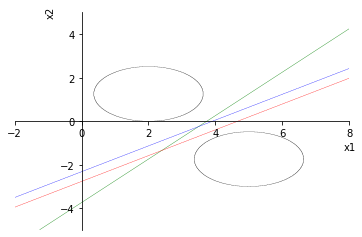

In [16]:
p0 = sp.plot_implicit(sp.Eq(frontEucl), (x1,-2,8), line_color='green',show=False )
p1 = sp.plot_implicit(sp.Eq(frontEqPrior), (x1,-2,8), line_color='blue',show=False )
p2 = sp.plot_implicit(sp.Eq(frontDifPrior), (x1,-2,8), line_color='red',show=False )

em1 = expr_dm.subs([(m1,mc1[0]),(m2,mc1[1])])
em2 =  expr_dm.subs([(m1,mc2[0]),(m2,mc2[1])])
p3 = sp.plot_implicit(sp.Eq(em1-1), (x1,-2,8), line_color='black',show=False)
p4 = sp.plot_implicit(sp.Eq(em2-1), (x1,-2,8), line_color='black',show=False)

p0.extend(p1)
p0.extend(p2)
p0.extend(p3)
p0.extend(p4)

p0.show()